In [25]:
import pandas as pd
df=pd.read_csv("housePrice.csv")
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000
3469,83,2,True,True,True,Niavaran,6800000000
3470,75,2,False,False,False,Parand,365000000
3471,105,2,True,True,True,Dorous,5600000000


In [26]:
# remove empty rows
df=df.dropna()
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000
3469,83,2,True,True,True,Niavaran,6800000000
3470,75,2,False,False,False,Parand,365000000
3471,105,2,True,True,True,Dorous,5600000000


In [27]:
quartiles=df['Price'].describe()

In [28]:
# function to return values
def labeling_price(x):
    if x<=quartiles["25%"]:
        return "cheap"
    elif x<=quartiles["50%"]:
        return "underMean"
    elif x<=quartiles["75%"]:
        return "upperMean"
    elif x>=quartiles["75%"]:
        return "expensive"
labeld_df=df.copy()
labeld_df['priceLevel']=labeld_df['Price'].apply(labeling_price)
labeld_df
    

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,True,True,True,Shahran,1850000000,underMean
1,60,1,True,True,True,Shahran,1850000000,underMean
2,79,2,True,True,True,Pardis,550000000,cheap
3,95,2,True,True,True,Shahrake Qods,902500000,cheap
4,123,2,True,True,True,Shahrake Gharb,7000000000,expensive
...,...,...,...,...,...,...,...,...
3468,86,2,True,True,True,Southern Janatabad,3500000000,upperMean
3469,83,2,True,True,True,Niavaran,6800000000,expensive
3470,75,2,False,False,False,Parand,365000000,cheap
3471,105,2,True,True,True,Dorous,5600000000,upperMean


In [29]:
# convert to numerical values 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
number_df=labeld_df.copy()
number_df['priceLevel'] = le.fit_transform(number_df['priceLevel'])
number_df['Elevator'] = le.fit_transform(number_df['Elevator'])

number_df['Address'] = le.fit_transform(number_df['Address'])
number_df['Warehouse'] = le.fit_transform(number_df['Warehouse'])

number_df['Parking'] = le.fit_transform(number_df['Parking'])

number_df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,1,1,1,156,1850000000,2
1,60,1,1,1,1,156,1850000000,2
2,79,2,1,1,1,117,550000000,0
3,95,2,1,1,1,152,902500000,0
4,123,2,1,1,1,150,7000000000,1
...,...,...,...,...,...,...,...,...
3468,86,2,1,1,1,163,3500000000,3
3469,83,2,1,1,1,105,6800000000,1
3470,75,2,0,0,0,115,365000000,0
3471,105,2,1,1,1,39,5600000000,3


In [30]:
# normilizing features
from sklearn.preprocessing import StandardScaler,MinMaxScaler
columns=["Area","Room","Parking","Warehouse","Elevator","Address","Price"]
selected_cols=number_df[columns]
# normilize 
normal_df=number_df.copy(deep=True)
scaler = MinMaxScaler()
normal_df[columns] = scaler.fit_transform(selected_cols)
normal_df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,0.036707,0.2,1.0,1.0,1.0,0.816754,0.019983,2
1,0.033370,0.2,1.0,1.0,1.0,0.816754,0.019983,2
2,0.054505,0.4,1.0,1.0,1.0,0.612565,0.005914,0
3,0.072303,0.4,1.0,1.0,1.0,0.795812,0.009729,0
4,0.103448,0.4,1.0,1.0,1.0,0.785340,0.075722,1
...,...,...,...,...,...,...,...,...
3468,0.062291,0.4,1.0,1.0,1.0,0.853403,0.037841,3
3469,0.058954,0.4,1.0,1.0,1.0,0.549738,0.073557,1
3470,0.050056,0.4,0.0,0.0,0.0,0.602094,0.003911,0
3471,0.083426,0.4,1.0,1.0,1.0,0.204188,0.060569,3


In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(normal_df, test_size=0.2, random_state=42)
train

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
74,0.036707,0.2,1.0,1.0,1.0,0.638743,0.023230,2
49,0.033370,0.2,1.0,1.0,1.0,0.005236,0.026585,2
2523,0.061179,0.4,1.0,1.0,1.0,0.612565,0.006996,0
2956,0.012236,0.2,0.0,0.0,1.0,0.837696,0.008511,0
812,0.105673,0.6,1.0,1.0,1.0,0.638743,0.068146,1
...,...,...,...,...,...,...,...,...
1098,0.022247,0.2,1.0,1.0,1.0,0.581152,0.016195,2
1135,0.116796,0.6,1.0,1.0,1.0,0.654450,0.031889,3
1299,0.042269,0.4,1.0,1.0,1.0,0.554974,0.026477,2
863,0.052280,0.4,1.0,1.0,1.0,0.298429,0.059963,3


In [32]:
test

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
1456,0.054505,0.4,1.0,1.0,1.0,0.209424,0.028101,2
52,0.133482,0.6,1.0,1.0,1.0,0.261780,0.108190,1
568,0.281424,0.6,1.0,1.0,1.0,0.989529,0.321402,1
1618,0.038932,0.4,1.0,1.0,0.0,0.628272,0.017819,2
1169,0.040044,0.4,1.0,1.0,1.0,0.581152,0.017115,2
...,...,...,...,...,...,...,...,...
721,0.053393,0.4,1.0,1.0,1.0,0.209424,0.035677,3
2722,0.026696,0.2,0.0,0.0,0.0,0.602094,0.002775,0
582,0.428254,1.0,1.0,1.0,1.0,0.549738,0.583858,1
2633,0.035595,0.2,0.0,0.0,0.0,0.162304,0.007645,0


In [33]:
# linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
columns=["Area","Room","Parking","Warehouse","Elevator","Address"]
l_model = LinearRegression()
l_model.fit(train[columns],train["Price"])
# Predict using the trained model
y_pred = l_model.predict(train[columns])
accuracy = r2_score(train["Price"], y_pred)
# Calculate mean squared error (for regression problems)
mse = mean_squared_error(train["Price"], y_pred)
print("Accuracy train:", accuracy)
print("Mean Squared Error train:", mse)
y_pred_test = l_model.predict(test[columns])
accuracy = r2_score(test["Price"], y_pred_test)
# Calculate mean squared error (for regression problems)
mse = mean_squared_error(test["Price"], y_pred_test)
print("Accuracy test:", accuracy)
print("Mean Squared Error test:", mse)

Accuracy train: 0.5398110879615355
Mean Squared Error train: 0.0034261001984528553
Accuracy test: 0.5322393973976474
Mean Squared Error test: 0.004145346470772806


In [34]:
# quadratic regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics._regression import mean_squared_error,r2_score
poly_reg = PolynomialFeatures(degree=2)
columns=["Area","Room","Parking","Warehouse","Elevator","Address"]
X_poly = poly_reg.fit_transform(train[columns])
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train['Price'])
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(train[columns]))
# print mse, r2
mse=mean_squared_error(train['Price'], y_pred_poly)
accuracy=r2_score(train['Price'], y_pred_poly)
print("Accuracy train:", accuracy)
print("Mean Squared Error train:", mse)
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(test[columns]))
# print mse, r2
mse=mean_squared_error(test['Price'], y_pred_poly)
accuracy=r2_score(test['Price'], y_pred_poly)

print("Accuracy test:", accuracy)
print("Mean Squared Error test:", mse)

Accuracy train: 0.6742365738730285
Mean Squared Error train: 0.0024253042820141023
Accuracy test: 0.7219367829149197
Mean Squared Error test: 0.0024642271477815416


In [35]:
# cubic regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics._regression import mean_squared_error,r2_score
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train[columns])
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train['Price'])
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(train[columns]))
# print mse, r2
mse=mean_squared_error(train['Price'], y_pred_poly)
accuracy=r2_score(train['Price'], y_pred_poly)
print("Accuracy train:", accuracy)
print("Mean Squared Error train:", mse)
y_pred_poly = pol_reg.predict(poly_reg.fit_transform(test[columns]))
# print mse, r2
mse=mean_squared_error(test['Price'], y_pred_poly)
accuracy=r2_score(test['Price'], y_pred_poly)

print("Accuracy test:", accuracy)
print("Mean Squared Error test:", mse)

Accuracy train: 0.7540314254055283
Mean Squared Error train: 0.0018312326963689386
Accuracy test: 0.7261380267051085
Mean Squared Error test: 0.0024269952581747107


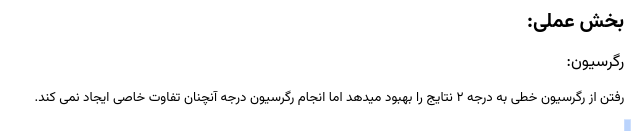

In [36]:
# classification
# Desicion tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# make dtc based on entropy:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(train[columns], train['priceLevel'])
y_pred_dtc = dtc.predict(train[columns])
accuracy_score(train['priceLevel'], y_pred_dtc), confusion_matrix(train['priceLevel'], y_pred_dtc), classification_report(train['priceLevel'], y_pred_dtc, output_dict=True)

(0.9746376811594203,
 array([[698,   1,   0,   0],
        [  0, 660,   0,  10],
        [  8,   0, 680,  12],
        [  4,   8,  27, 652]]),
 {'0': {'precision': 0.9830985915492958,
   'recall': 0.9985693848354793,
   'f1-score': 0.9907735982966643,
   'support': 699},
  '1': {'precision': 0.9865470852017937,
   'recall': 0.9850746268656716,
   'f1-score': 0.9858103061986556,
   'support': 670},
  '2': {'precision': 0.9618104667609618,
   'recall': 0.9714285714285714,
   'f1-score': 0.9665955934612651,
   'support': 700},
  '3': {'precision': 0.9673590504451038,
   'recall': 0.9435600578871202,
   'f1-score': 0.9553113553113554,
   'support': 691},
  'accuracy': 0.9746376811594203,
  'macro avg': {'precision': 0.9747037984892888,
   'recall': 0.9746581602542106,
   'f1-score': 0.9746227133169851,
   'support': 2760},
  'weighted avg': {'precision': 0.9745959757856519,
   'recall': 0.9746376811594203,
   'f1-score': 0.9745582290961956,
   'support': 2760}})

In [37]:
# test values
y_pred_dtc = dtc.predict(test[columns])
accuracy_score(test['priceLevel'], y_pred_dtc), confusion_matrix(test['priceLevel'], y_pred_dtc), classification_report(test['priceLevel'], y_pred_dtc, output_dict=True)

(0.7724637681159421,
 array([[135,   3,  19,   7],
        [  2, 163,   5,  15],
        [ 27,   5, 118,  20],
        [ 11,  21,  22, 117]]),
 {'0': {'precision': 0.7714285714285715,
   'recall': 0.823170731707317,
   'f1-score': 0.7964601769911503,
   'support': 164},
  '1': {'precision': 0.8489583333333334,
   'recall': 0.8810810810810811,
   'f1-score': 0.8647214854111406,
   'support': 185},
  '2': {'precision': 0.7195121951219512,
   'recall': 0.6941176470588235,
   'f1-score': 0.7065868263473054,
   'support': 170},
  '3': {'precision': 0.7358490566037735,
   'recall': 0.6842105263157895,
   'f1-score': 0.709090909090909,
   'support': 171},
  'accuracy': 0.7724637681159421,
  'macro avg': {'precision': 0.7689370391219074,
   'recall': 0.7706449965407527,
   'f1-score': 0.7692148494601263,
   'support': 690},
  'weighted avg': {'precision': 0.7706070133781585,
   'recall': 0.7724637681159421,
   'f1-score': 0.7709670286394159,
   'support': 690}})

In [38]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,confusion_matrix

rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(train[columns], train['priceLevel'])
y_pred_rfc = rfc.predict(train[columns])
accuracy_score(train['priceLevel'], y_pred_rfc), confusion_matrix(train['priceLevel'], y_pred_rfc), classification_report(train['priceLevel'], y_pred_rfc, output_dict=True)

(0.9746376811594203,
 array([[691,   1,   4,   3],
        [  0, 657,   0,  13],
        [  4,   0, 678,  18],
        [  1,   5,  21, 664]]),
 {'0': {'precision': 0.992816091954023,
   'recall': 0.9885550786838341,
   'f1-score': 0.9906810035842294,
   'support': 699},
  '1': {'precision': 0.9909502262443439,
   'recall': 0.9805970149253731,
   'f1-score': 0.9857464366091523,
   'support': 670},
  '2': {'precision': 0.9644381223328592,
   'recall': 0.9685714285714285,
   'f1-score': 0.9665003563791875,
   'support': 700},
  '3': {'precision': 0.9512893982808023,
   'recall': 0.9609261939218524,
   'f1-score': 0.9560835133189345,
   'support': 691},
  'accuracy': 0.9746376811594203,
  'macro avg': {'precision': 0.9748734597030071,
   'recall': 0.9746624290256221,
   'f1-score': 0.974752827472876,
   'support': 2760},
  'weighted avg': {'precision': 0.9747691158350029,
   'recall': 0.9746376811594203,
   'f1-score': 0.9746884388414216,
   'support': 2760}})

In [39]:
# test acc
y_pred_rfc = rfc.predict(test[columns])
accuracy_score(test['priceLevel'], y_pred_rfc), confusion_matrix(test['priceLevel'], y_pred_rfc), classification_report(test['priceLevel'], y_pred_rfc, output_dict=True)

(0.7420289855072464,
 array([[133,   2,  23,   6],
        [  1, 160,   3,  21],
        [ 24,   7, 111,  28],
        [ 12,  24,  27, 108]]),
 {'0': {'precision': 0.7823529411764706,
   'recall': 0.8109756097560976,
   'f1-score': 0.7964071856287426,
   'support': 164},
  '1': {'precision': 0.8290155440414507,
   'recall': 0.8648648648648649,
   'f1-score': 0.8465608465608466,
   'support': 185},
  '2': {'precision': 0.676829268292683,
   'recall': 0.6529411764705882,
   'f1-score': 0.6646706586826348,
   'support': 170},
  '3': {'precision': 0.6625766871165644,
   'recall': 0.631578947368421,
   'f1-score': 0.6467065868263473,
   'support': 171},
  'accuracy': 0.7420289855072464,
  'macro avg': {'precision': 0.7376936101567921,
   'recall': 0.740090149614993,
   'f1-score': 0.7385863194246429,
   'support': 690},
  'weighted avg': {'precision': 0.7391816624743451,
   'recall': 0.7420289855072464,
   'f1-score': 0.7402976425800344,
   'support': 690}})

In [40]:
# KNN  K=1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train[columns], train['priceLevel'])
y_pred_knn = knn.predict(train[columns])
accuracy_score(train['priceLevel'], y_pred_knn), confusion_matrix(train['priceLevel'], y_pred_knn), classification_report(train['priceLevel'], y_pred_knn, output_dict=True)

(0.9684782608695652,
 array([[695,   1,   2,   1],
        [  0, 659,   0,  11],
        [  6,   0, 668,  26],
        [  3,   8,  29, 651]]),
 {'0': {'precision': 0.9872159090909091,
   'recall': 0.994277539341917,
   'f1-score': 0.9907341411261583,
   'support': 699},
  '1': {'precision': 0.9865269461077845,
   'recall': 0.9835820895522388,
   'f1-score': 0.9850523168908819,
   'support': 670},
  '2': {'precision': 0.9556509298998569,
   'recall': 0.9542857142857143,
   'f1-score': 0.9549678341672623,
   'support': 700},
  '3': {'precision': 0.9448476052249637,
   'recall': 0.9421128798842258,
   'f1-score': 0.9434782608695652,
   'support': 691},
  'accuracy': 0.9684782608695652,
  'macro avg': {'precision': 0.9685603475808785,
   'recall': 0.968564555766024,
   'f1-score': 0.9685581382634669,
   'support': 2760},
  'weighted avg': {'precision': 0.9684356233648951,
   'recall': 0.9684782608695652,
   'f1-score': 0.9684526011384162,
   'support': 2760}})

In [41]:
# test
y_pred_knn = knn.predict(test[columns])
accuracy_score(test['priceLevel'], y_pred_knn), confusion_matrix(test['priceLevel'], y_pred_knn), classification_report(test['priceLevel'], y_pred_knn, output_dict=True)

(0.7565217391304347,
 array([[140,   0,  17,   7],
        [  7, 156,   6,  16],
        [ 22,   7, 113,  28],
        [ 15,  21,  22, 113]]),
 {'0': {'precision': 0.7608695652173914,
   'recall': 0.8536585365853658,
   'f1-score': 0.8045977011494252,
   'support': 164},
  '1': {'precision': 0.8478260869565217,
   'recall': 0.8432432432432433,
   'f1-score': 0.8455284552845529,
   'support': 185},
  '2': {'precision': 0.7151898734177216,
   'recall': 0.6647058823529411,
   'f1-score': 0.6890243902439024,
   'support': 170},
  '3': {'precision': 0.6890243902439024,
   'recall': 0.6608187134502924,
   'f1-score': 0.6746268656716418,
   'support': 171},
  'accuracy': 0.7565217391304347,
  'macro avg': {'precision': 0.7532274789588843,
   'recall': 0.7556065939079607,
   'f1-score': 0.7534443530873806,
   'support': 690},
  'weighted avg': {'precision': 0.7551244695584475,
   'recall': 0.7565217391304347,
   'f1-score': 0.7548871414311046,
   'support': 690}})

In [42]:
# KNN  K=3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train[columns], train['priceLevel'])
y_pred_knn = knn.predict(train[columns])
accuracy_score(train['priceLevel'], y_pred_knn), confusion_matrix(train['priceLevel'], y_pred_knn), classification_report(train['priceLevel'], y_pred_knn, output_dict=True)

(0.8565217391304348,
 array([[641,   7,  37,  14],
        [ 20, 602,   6,  42],
        [ 64,  20, 571,  45],
        [ 48,  44,  49, 550]]),
 {'0': {'precision': 0.8292367399741267,
   'recall': 0.9170243204577968,
   'f1-score': 0.8709239130434783,
   'support': 699},
  '1': {'precision': 0.8945022288261516,
   'recall': 0.8985074626865671,
   'f1-score': 0.8965003723008191,
   'support': 670},
  '2': {'precision': 0.861236802413273,
   'recall': 0.8157142857142857,
   'f1-score': 0.8378576669112253,
   'support': 700},
  '3': {'precision': 0.8448540706605223,
   'recall': 0.7959479015918958,
   'f1-score': 0.819672131147541,
   'support': 691},
  'accuracy': 0.8565217391304348,
  'macro avg': {'precision': 0.8574574604685183,
   'recall': 0.8567984926126364,
   'f1-score': 0.8562385208507659,
   'support': 2760},
  'weighted avg': {'precision': 0.8571061228518654,
   'recall': 0.8565217391304348,
   'f1-score': 0.855914809463677,
   'support': 2760}})

In [43]:
# test
y_pred_knn = knn.predict(test[columns])
accuracy_score(test['priceLevel'], y_pred_knn), confusion_matrix(test['priceLevel'], y_pred_knn), classification_report(test['priceLevel'], y_pred_knn, output_dict=True)

(0.7463768115942029,
 array([[135,   3,  22,   4],
        [ 12, 155,   3,  15],
        [ 25,   8, 116,  21],
        [ 21,  22,  19, 109]]),
 {'0': {'precision': 0.6994818652849741,
   'recall': 0.823170731707317,
   'f1-score': 0.7563025210084034,
   'support': 164},
  '1': {'precision': 0.824468085106383,
   'recall': 0.8378378378378378,
   'f1-score': 0.8310991957104557,
   'support': 185},
  '2': {'precision': 0.725,
   'recall': 0.6823529411764706,
   'f1-score': 0.7030303030303031,
   'support': 170},
  '3': {'precision': 0.7315436241610739,
   'recall': 0.6374269005847953,
   'f1-score': 0.68125,
   'support': 171},
  'accuracy': 0.7463768115942029,
  'macro avg': {'precision': 0.7451233936381078,
   'recall': 0.7451971028266052,
   'f1-score': 0.7429205049372906,
   'support': 690},
  'weighted avg': {'precision': 0.7472254802651599,
   'recall': 0.7463768115942029,
   'f1-score': 0.7446316900970492,
   'support': 690}})

In [44]:
# KNN  K=5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train[columns], train['priceLevel'])
y_pred_knn = knn.predict(train[columns])
accuracy_score(train['priceLevel'], y_pred_knn), confusion_matrix(train['priceLevel'], y_pred_knn), classification_report(train['priceLevel'], y_pred_knn, output_dict=True)

(0.8097826086956522,
 array([[611,   7,  63,  18],
        [ 18, 598,   7,  47],
        [ 89,  25, 530,  56],
        [ 50,  72,  73, 496]]),
 {'0': {'precision': 0.7955729166666666,
   'recall': 0.8741058655221745,
   'f1-score': 0.8329925017041582,
   'support': 699},
  '1': {'precision': 0.8518518518518519,
   'recall': 0.8925373134328358,
   'f1-score': 0.8717201166180758,
   'support': 670},
  '2': {'precision': 0.787518573551263,
   'recall': 0.7571428571428571,
   'f1-score': 0.7720320466132558,
   'support': 700},
  '3': {'precision': 0.8038897893030794,
   'recall': 0.7178002894356006,
   'f1-score': 0.7584097859327217,
   'support': 691},
  'accuracy': 0.8097826086956522,
  'macro avg': {'precision': 0.8097082828432152,
   'recall': 0.8103965813833669,
   'f1-score': 0.8087886127170529,
   'support': 2760},
  'weighted avg': {'precision': 0.809274295429367,
   'recall': 0.8097826086956522,
   'f1-score': 0.8082600838891691,
   'support': 2760}})

In [45]:
# test
y_pred_knn = knn.predict(test[columns])
accuracy_score(test['priceLevel'], y_pred_knn), confusion_matrix(test['priceLevel'], y_pred_knn), classification_report(test['priceLevel'], y_pred_knn, output_dict=True)

(0.7565217391304347,
 array([[132,   3,  26,   3],
        [  6, 160,   3,  16],
        [ 21,   9, 123,  17],
        [ 17,  24,  23, 107]]),
 {'0': {'precision': 0.75,
   'recall': 0.8048780487804879,
   'f1-score': 0.7764705882352942,
   'support': 164},
  '1': {'precision': 0.8163265306122449,
   'recall': 0.8648648648648649,
   'f1-score': 0.8398950131233596,
   'support': 185},
  '2': {'precision': 0.7028571428571428,
   'recall': 0.7235294117647059,
   'f1-score': 0.7130434782608696,
   'support': 170},
  '3': {'precision': 0.7482517482517482,
   'recall': 0.6257309941520468,
   'f1-score': 0.6815286624203821,
   'support': 171},
  'accuracy': 0.7565217391304347,
  'macro avg': {'precision': 0.754358855430284,
   'recall': 0.7547508298905263,
   'f1-score': 0.7527344355099764,
   'support': 690},
  'weighted avg': {'precision': 0.7557350310145341,
   'recall': 0.7565217391304347,
   'f1-score': 0.7543196325748447,
   'support': 690}})

In [46]:
# SVM 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,confusion_matrix

svm = SVC()
svm.fit(train[columns], train['priceLevel'])
y_pred_svm = svm.predict(train[columns])
accuracy_score(train['priceLevel'], y_pred_svm), confusion_matrix(train['priceLevel'], y_pred_svm), classification_report(train['priceLevel'], y_pred_svm, output_dict=True)

(0.561231884057971,
 array([[347,  19, 132, 201],
        [ 17, 452,  16, 185],
        [106,  25, 280, 289],
        [ 37, 108,  76, 470]]),
 {'0': {'precision': 0.6844181459566075,
   'recall': 0.49642346208869814,
   'f1-score': 0.5754560530679934,
   'support': 699},
  '1': {'precision': 0.7483443708609272,
   'recall': 0.6746268656716418,
   'f1-score': 0.7095761381475667,
   'support': 670},
  '2': {'precision': 0.5555555555555556,
   'recall': 0.4,
   'f1-score': 0.46511627906976744,
   'support': 700},
  '3': {'precision': 0.4104803493449782,
   'recall': 0.6801736613603473,
   'f1-score': 0.5119825708061002,
   'support': 691},
  'accuracy': 0.561231884057971,
  'macro avg': {'precision': 0.5996996054295172,
   'recall': 0.5628059972801718,
   'f1-score': 0.5655327602728569,
   'support': 2760},
  'weighted avg': {'precision': 0.5986702256473764,
   'recall': 0.561231884057971,
   'f1-score': 0.5641380961700179,
   'support': 2760}})

In [47]:
y_pred_svm = svm.predict(test[columns])
accuracy_score(test['priceLevel'], y_pred_svm), confusion_matrix(test['priceLevel'], y_pred_svm), classification_report(test['priceLevel'], y_pred_svm, output_dict=True)

(0.553623188405797,
 array([[ 78,   8,  29,  49],
        [  7, 124,   4,  50],
        [ 25,   8,  58,  79],
        [  8,  25,  16, 122]]),
 {'0': {'precision': 0.6610169491525424,
   'recall': 0.47560975609756095,
   'f1-score': 0.5531914893617021,
   'support': 164},
  '1': {'precision': 0.7515151515151515,
   'recall': 0.6702702702702703,
   'f1-score': 0.7085714285714285,
   'support': 185},
  '2': {'precision': 0.5420560747663551,
   'recall': 0.3411764705882353,
   'f1-score': 0.4187725631768953,
   'support': 170},
  '3': {'precision': 0.4066666666666667,
   'recall': 0.7134502923976608,
   'f1-score': 0.5180467091295118,
   'support': 171},
  'accuracy': 0.553623188405797,
  'macro avg': {'precision': 0.5903137105251789,
   'recall': 0.5501266973384318,
   'f1-score': 0.5496455475598845,
   'support': 690},
  'weighted avg': {'precision': 0.5929371237704353,
   'recall': 0.553623188405797,
   'f1-score': 0.5530238283221045,
   'support': 690}})

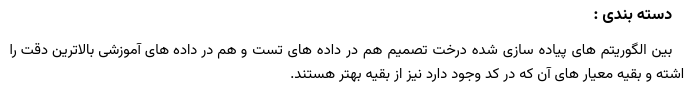

In [50]:
# neural network classifier 
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# make one-hot encoding for the labels using tensorflow:
train_labels = tf.keras.utils.to_categorical(train['priceLevel'])
test_labels = tf.keras.utils.to_categorical(test['priceLevel'])
# train the model:
real_model = model.fit(train[columns], train_labels, epochs=30)
# predict:
y_pred_nn = model.predict(test[columns])
# print accuracy and confusion_metrics
tf.math.confusion_matrix(test_labels.argmax(axis=1), y_pred_nn.argmax(axis=1)), accuracy_score(test_labels.argmax(axis=1), y_pred_nn.argmax(axis=1))



Epoch 1/30
87/87 [==============================] - 0s 518us/step - loss: 1.3816 - accuracy: 0.2743
Epoch 2/30
87/87 [==============================] - 0s 473us/step - loss: 1.3736 - accuracy: 0.2634
Epoch 3/30
87/87 [==============================] - 0s 471us/step - loss: 1.3621 - accuracy: 0.2663
Epoch 4/30
87/87 [==============================] - 0s 496us/step - loss: 1.3446 - accuracy: 0.2931
Epoch 5/30
87/87 [==============================] - 0s 530us/step - loss: 1.3210 - accuracy: 0.3011
Epoch 6/30
87/87 [==============================] - 0s 507us/step - loss: 1.2943 - accuracy: 0.3598
Epoch 7/30
87/87 [==============================] - 0s 577us/step - loss: 1.2707 - accuracy: 0.4225
Epoch 8/30
87/87 [==============================] - 0s 535us/step - loss: 1.2511 - accuracy: 0.4413
Epoch 9/30
87/87 [==============================] - 0s 525us/step - loss: 1.2324 - accuracy: 0.4906
Epoch 10/30
87/87 [==============================] - 0s 524us/step - loss: 1.2141 - accuracy: 0.5007

(<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
 array([[ 67,   8,  44,  45],
        [  3, 136,   4,  42],
        [ 19,  10, 100,  41],
        [  7,  27,  26, 111]], dtype=int32)>,
 0.6)

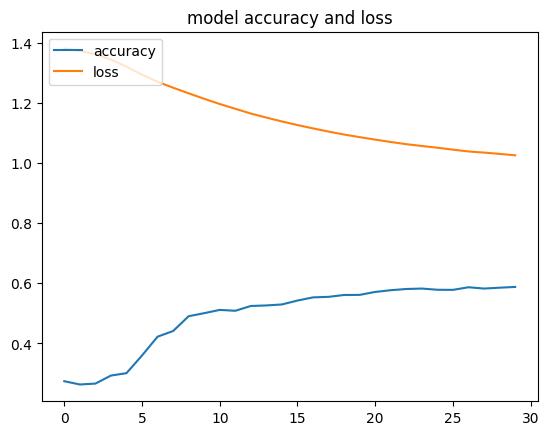

In [52]:
# plot model history
import matplotlib.pyplot as plt

plt.plot(real_model.history['accuracy'])
plt.plot(real_model.history['loss'])
plt.title('model accuracy and loss')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()